<a href="https://colab.research.google.com/github/thinkp0907/Ml_yahac/blob/master/Ml_yahac_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#분류모델

- 분류모델은 회귀모델과 다르게 범주형 데이터를 예측한다.
- 범주형 데이터는 양적 데이터와 다르게 수식에 사용할 수 없다.
- 범주형 데이터를 수식에 사용하기 위해서는 OneHot Encoding을 사용해야한다
```python
아이리스 = pd.read_csv('iris.csv')  
아이리스 = pd.get_dummies(data)
```    
> - 아이리스 = pd.get_dummies(아이리스) -> onehot encoding으로 만들어준다   
> - deep learning 을 사용하기 위해서는 모든 범주형을 onehot encoding을 해야한다.  
> - onehot encoding으로 인해 종속변수 개수 증가 ( 3개로 증가 )

그렇기 때문에 모델의 구조를 만들때
> ```python
> X = tf.keras.layers.Input(shape=[4])
> Y = tf.keras.layers.Dense(3, activation='softmax')(X)
> model = tf.keras.Model(X, Y)
> model.compile(loss='categorical_crossentropy', metrics='accuracy')
> ```
> X에는 **shape=[4]**, Y에는 **3**을 입력

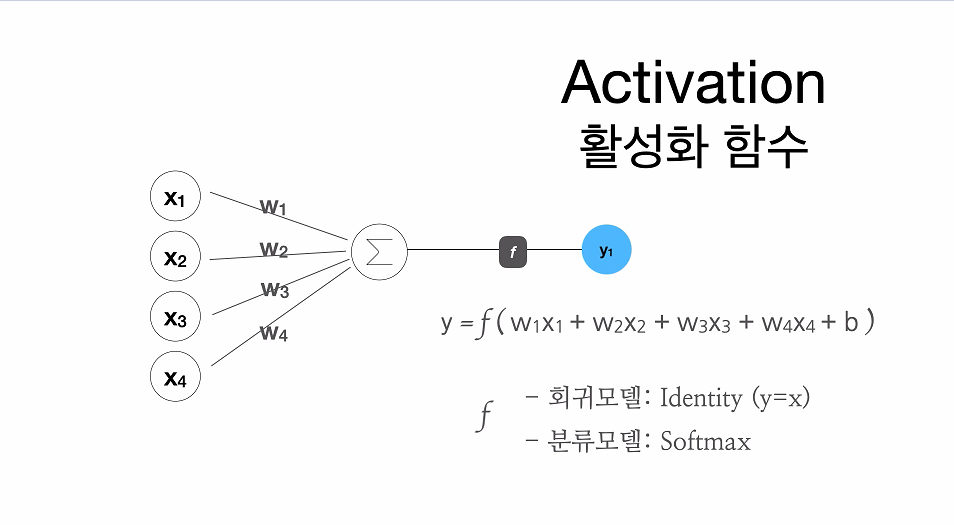

In [1]:
# 라이브러리 사용
import tensorflow as tf
import pandas as pd

In [7]:
# 1. 과거 데이터 준비
파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv'
아이리스 = pd.read_csv(파일경로)
display(아이리스.head())
# 원핫인코딩
아이리스 = pd.get_dummies(아이리스)
display(아이리스.head())

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_setosa,품종_versicolor,품종_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [5]:
# 아이리스 데이터 column 확인하기
아이리스.columns

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')

In [8]:
# 독립변수(원인), 종속변수(결과) 나누기
독립 = 아이리스[['꽃잎길이','꽃잎폭','꽃받침길이','꽃받침폭']]
종속 = 아이리스[['품종_setosa','품종_versicolor','품종_virginica']]
print(독립.shape, 종속.shape)

(150, 4) (150, 3)


In [14]:
# 2. 모델의 구조 만들기
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(3, activation='softmax')(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics="accuracy")

In [22]:
# 3. 데이터로 모델을 학습하기
model.fit(독립, 종속, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9800
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9800
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9733
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2046 - accuracy: 0.9800
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9733
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9800
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9733
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9800
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9733
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2023 - accuracy: 0.9733
Epoch 11/100
5/5 [===========

In [26]:
# 모델을 이용합니다
model.predict(독립[-5:])

array([[8.4700378e-06, 1.7429805e-01, 8.2569349e-01],
       [1.3192204e-05, 2.2788526e-01, 7.7210152e-01],
       [2.2471277e-05, 2.6726344e-01, 7.3271412e-01],
       [6.4647534e-06, 1.1927101e-01, 8.8072252e-01],
       [3.5905956e-05, 2.6256502e-01, 7.3739904e-01]], dtype=float32)

In [25]:
종속[-5:]

,품종_setosa,품종_versicolor,품종_virginica
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1
149,0,0,1


In [27]:
# 학습한 가중치 출력
model.get_weights()

[array([[ 0.5965446 ,  0.23451681, -0.9183802 ],
        [ 2.8179057 ,  0.6430897 , -0.43474114],
        [-3.1072805 , -0.20871174,  1.2841405 ],
        [-3.4608161 , -1.3920124 ,  1.1997051 ]], dtype=float32),
 array([ 1.4403108 ,  0.49152595, -0.71889573], dtype=float32)]